In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/patient.csv')
df.head()

,TEXT
0,Right side of epiglottis swelled up and hinder...
1,Approximately 30 min post vaccination administ...
2,"About 15 minutes after receiving the vaccine, ..."
3,"extreme fatigue, dizziness,. could not lift my..."
4,"Injection site swelling, redness, warm to the ..."


In [ ]:
#Not able to read the text fully so increase the width 
pd.set_option('display.max_colwidth',200)
df.head()

,TEXT
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for pa..."
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. ..."
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours"
4,"Injection site swelling, redness, warm to the touch and itchy"


REMOVE PUNCTUATION & LOWER CASE

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(text):
  nil_punc="".join([char.lower() for char in text if char not in string.punctuation])
  return nil_punc


In [ ]:
df['no_punc']=df['TEXT'].apply(lambda x: remove_punc(x))
df.head()

,TEXT,no_punc
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for pa...",approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patien...
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. ...",about 15 minutes after receiving the vaccine the patient complained about her left arm hurting she also complained of chest tightness and difficulty swallowing patient also had vision changes we g...
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours",extreme fatigue dizziness could not lift my left arm for 72 hours
4,"Injection site swelling, redness, warm to the touch and itchy",injection site swelling redness warm to the touch and itchy


In [ ]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['no_punc']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df.head()

,TEXT,no_punc,tokenized_sents
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken,"[right, side, of, epiglottis, swelled, up, and, hinder, swallowing, pictures, taken, benadryl, tylenol, taken]"
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for pa...",approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patien...,"[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, and, anxiousness, assessed, at, time, of, event, heart, sounds, normal, lung, sounds, clear, vitals, within,..."
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. ...",about 15 minutes after receiving the vaccine the patient complained about her left arm hurting she also complained of chest tightness and difficulty swallowing patient also had vision changes we g...,"[about, 15, minutes, after, receiving, the, vaccine, the, patient, complained, about, her, left, arm, hurting, she, also, complained, of, chest, tightness, and, difficulty, swallowing, patient, al..."
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours",extreme fatigue dizziness could not lift my left arm for 72 hours,"[extreme, fatigue, dizziness, could, not, lift, my, left, arm, for, 72, hours]"
4,"Injection site swelling, redness, warm to the touch and itchy",injection site swelling redness warm to the touch and itchy,"[injection, site, swelling, redness, warm, to, the, touch, and, itchy]"


REMOVE STOP WORDS

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
def remove_stop(text):
  nil_stopwords = [word for word in text if not word in stop_words]
  return nil_stopwords

In [ ]:
df['no_stop'] = df['tokenized_sents'].apply(lambda x: remove_stop(x))

In [ ]:
df.head()

,TEXT,no_punc,tokenized_sents,no_stop
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken,"[right, side, of, epiglottis, swelled, up, and, hinder, swallowing, pictures, taken, benadryl, tylenol, taken]","[right, side, epiglottis, swelled, hinder, swallowing, pictures, taken, benadryl, tylenol, taken]"
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for pa...",approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patien...,"[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, and, anxiousness, assessed, at, time, of, event, heart, sounds, normal, lung, sounds, clear, vitals, within,...","[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, anxiousness, assessed, time, event, heart, sounds, normal, lung, sounds, clear, vitals, within, normal, limi..."
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. ...",about 15 minutes after receiving the vaccine the patient complained about her left arm hurting she also complained of chest tightness and difficulty swallowing patient also had vision changes we g...,"[about, 15, minutes, after, receiving, the, vaccine, the, patient, complained, about, her, left, arm, hurting, she, also, complained, of, chest, tightness, and, difficulty, swallowing, patient, al...","[15, minutes, receiving, vaccine, patient, complained, left, arm, hurting, also, complained, chest, tightness, difficulty, swallowing, patient, also, vision, changes, gave, patient, 1, tablet, ben..."
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours",extreme fatigue dizziness could not lift my left arm for 72 hours,"[extreme, fatigue, dizziness, could, not, lift, my, left, arm, for, 72, hours]","[extreme, fatigue, dizziness, could, lift, left, arm, 72, hours]"
4,"Injection site swelling, redness, warm to the touch and itchy",injection site swelling redness warm to the touch and itchy,"[injection, site, swelling, redness, warm, to, the, touch, and, itchy]","[injection, site, swelling, redness, warm, touch, itchy]"




POS TAGGING



In [ ]:
nltk.download('tagsets')
nltk.help.upenn_tagset("MD")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def remove_punc2(text):
  no_punct = " ".join([char.lower() for char in text if char not in string.punctuation])
  return no_punct

df['POS']=df['no_stop'].apply(lambda x: remove_punc2(x))
df.head(5)

,TEXT,no_punc,tokenized_sents,no_stop,POS
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken,"[right, side, of, epiglottis, swelled, up, and, hinder, swallowing, pictures, taken, benadryl, tylenol, taken]","[right, side, epiglottis, swelled, hinder, swallowing, pictures, taken, benadryl, tylenol, taken]",right side epiglottis swelled hinder swallowing pictures taken benadryl tylenol taken
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for pa...",approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patien...,"[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, and, anxiousness, assessed, at, time, of, event, heart, sounds, normal, lung, sounds, clear, vitals, within,...","[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, anxiousness, assessed, time, event, heart, sounds, normal, lung, sounds, clear, vitals, within, normal, limi...",approximately 30 min post vaccination administration patient demonstrated sob anxiousness assessed time event heart sounds normal lung sounds clear vitals within normal limits patient o2 91 3 lite...
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. ...",about 15 minutes after receiving the vaccine the patient complained about her left arm hurting she also complained of chest tightness and difficulty swallowing patient also had vision changes we g...,"[about, 15, minutes, after, receiving, the, vaccine, the, patient, complained, about, her, left, arm, hurting, she, also, complained, of, chest, tightness, and, difficulty, swallowing, patient, al...","[15, minutes, receiving, vaccine, patient, complained, left, arm, hurting, also, complained, chest, tightness, difficulty, swallowing, patient, also, vision, changes, gave, patient, 1, tablet, ben...",15 minutes receiving vaccine patient complained left arm hurting also complained chest tightness difficulty swallowing patient also vision changes gave patient 1 tablet benadryl 25 mg called ems s...
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours",extreme fatigue dizziness could not lift my left arm for 72 hours,"[extreme, fatigue, dizziness, could, not, lift, my, left, arm, for, 72, hours]","[extreme, fatigue, dizziness, could, lift, left, arm, 72, hours]",extreme fatigue dizziness could lift left arm 72 hours
4,"Injection site swelling, redness, warm to the touch and itchy",injection site swelling redness warm to the touch and itchy,"[injection, site, swelling, redness, warm, to, the, touch, and, itchy]","[injection, site, swelling, redness, warm, touch, itchy]",injection site swelling redness warm touch itchy


LEMMATIZATION



In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag -> wordnet tag -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Processed'] = df['POS'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df.head()

,TEXT,no_punc,tokenized_sents,no_stop,POS,Processed
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken,"[right, side, of, epiglottis, swelled, up, and, hinder, swallowing, pictures, taken, benadryl, tylenol, taken]","[right, side, epiglottis, swelled, hinder, swallowing, pictures, taken, benadryl, tylenol, taken]",right side epiglottis swelled hinder swallowing pictures taken benadryl tylenol taken,right side epiglottis swell hinder swallowing picture take benadryl tylenol take
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for pa...",approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patien...,"[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, and, anxiousness, assessed, at, time, of, event, heart, sounds, normal, lung, sounds, clear, vitals, within,...","[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, anxiousness, assessed, time, event, heart, sounds, normal, lung, sounds, clear, vitals, within, normal, limi...",approximately 30 min post vaccination administration patient demonstrated sob anxiousness assessed time event heart sounds normal lung sounds clear vitals within normal limits patient o2 91 3 lite...,approximately 30 min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient o2 91 3 liter nc c...
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. ...",about 15 minutes after receiving the vaccine the patient complained about her left arm hurting she also complained of chest tightness and difficulty swallowing patient also had vision changes we g...,"[about, 15, minutes, after, receiving, the, vaccine, the, patient, complained, about, her, left, arm, hurting, she, also, complained, of, chest, tightness, and, difficulty, swallowing, patient, al...","[15, minutes, receiving, vaccine, patient, complained, left, arm, hurting, also, complained, chest, tightness, difficulty, swallowing, patient, also, vision, changes, gave, patient, 1, tablet, ben...",15 minutes receiving vaccine patient complained left arm hurting also complained chest tightness difficulty swallowing patient also vision changes gave patient 1 tablet benadryl 25 mg called ems s...,15 minute receive vaccine patient complain left arm hurting also complain chest tightness difficulty swallow patient also vision change give patient 1 tablet benadryl 25 mg call em service ems che...
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours",extreme fatigue dizziness could not lift my left arm for 72 hours,"[extreme, fatigue, dizziness, could, not, lift, my, left, arm, for, 72, hours]","[extreme, fatigue, dizziness, could, lift, left, arm, 72, hours]",extreme fatigue dizziness could lift left arm 72 hours,extreme fatigue dizziness could lift leave arm 72 hour
4,"Injection site swelling, redness, warm to the touch and itchy",injection site swelling redness warm to the touch and itchy,"[injection, site, swelling, redness, warm, to, the, touch, and, itchy]","[injection, site, swelling, redness, warm, touch, itchy]",injection site swelling redness warm touch itchy,injection site swell redness warm touch itchy


In [ ]:
df['Id']=list(range(499))
df=df[['Id','Processed']]
df = pd.DataFrame(df)
df.head()

,Id,Processed
0,0,right side epiglottis swell hinder swallowing picture take benadryl tylenol take
1,1,approximately 30 min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient o2 91 3 liter nc c...
2,2,15 minute receive vaccine patient complain left arm hurting also complain chest tightness difficulty swallow patient also vision change give patient 1 tablet benadryl 25 mg call em service ems che...
3,3,extreme fatigue dizziness could lift leave arm 72 hour
4,4,injection site swell redness warm touch itchy


In [ ]:
df_new=df.copy(deep=True)

MOST FREQUENT WORD

In [ ]:
from nltk.probability import FreqDist
from nltk.corpus import webtext
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [ ]:
freqD=list([nltk.FreqDist(i) for i in df['Processed']])
len(freqD)

499

In [ ]:
from collections import Counter

In [ ]:
cnt=Counter()
for text in df['Processed'].values:
  for i in text.split():
    cnt[i]+=1 
l=len(cnt)    
mfw = cnt.most_common(l)    
mfw = pd.DataFrame(mfw[::],columns=['Word','Count'])   
mfw.T

,0,1,2,3,4,5,6,7,8,9,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
Word,day,injection,pain,hour,headache,site,vaccine,arm,fever,chill,...,swellinglymphadenopathy,occurr,consumes,eve,10ft,mom,1600,on,120140s,vigorous
Count,256,224,204,202,192,178,166,158,155,146,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
#most frequent and least frequent words
most_frequent_word = mfw[:51]

In [ ]:
print(most_frequent_word)

             Word  Count
0             day    256
1       injection    224
2            pain    204
3            hour    202
4        headache    192
5            site    178
6         vaccine    166
7             arm    158
8           fever    155
9           chill    146
10           ache    116
11        patient    115
12          leave    114
13        symptom    113
14          start    109
15           take    103
16        fatigue    101
17          swell     96
18           body     96
19         nausea     95
20           felt     88
21         severe     78
22        receive     73
23             go     73
24           feel     68
25         muscle     62
26           last     61
27           sore     59
28         minute     57
29    vaccination     56
30       benadryl     55
31           rash     55
32              2     54
33          still     54
34            red     54
35         around     54
36        redness     53
37            get     53
38       continue     51


In [ ]:
least_frequent_word = mfw[2300:-1]
print(least_frequent_word)

                         Word  Count
2300                     0924      1
2301                     0938      1
2302                        s      1
2303                     1014      1
2304               projectile      1
2305                  hellish      1
2306                     nine      1
2307             constriction      1
2308                     used      1
2309                   proair      1
2310                     easy      1
2311                      hrs      1
2312                  primary      1
2313                dissipate      1
2314                      410      1
2315                      add      1
2316                     hole      1
2317                    write      1
2318                 constant      1
2319                     8050      1
2320                    blade      1
2321                 numerous      1
2322                   number      1
2323                   effort      1
2324                  prevent      1
2325                 contract      1
2

In [ ]:
import re
def remove_num(text):
  no_num = re.findall(r'[a-zA-Z]+',text)
  return " " .join(no_num)
df['Processed_new']=df['Processed'].apply(lambda x: remove_num(x))
df['Processed_new']

0                                                                                                                             right side epiglottis swell hinder swallowing picture take benadryl tylenol take
1      approximately min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient o liter nc continuous...
2      minute receive vaccine patient complain left arm hurting also complain chest tightness difficulty swallow patient also vision change give patient tablet benadryl mg call em service ems check advis...
3                                                                                                                                                          extreme fatigue dizziness could lift leave arm hour
4                                                                                                                                                                injection s

In [ ]:
freqD=list([nltk.FreqDist(i) for i in df['Processed_new']])
len(freqD)

499

In [ ]:
cnt=Counter()
for text in df['Processed_new'].values:
  for i in text.split():
    cnt[i]+=1 
l=len(cnt)    
mfw = cnt.most_common(l)    
mfw = pd.DataFrame(mfw[::],columns=['Word','Count'])   
mfw.T

,0,1,2,3,4,5,6,7,8,9,...,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915
Word,day,injection,pain,hour,headache,site,vaccine,arm,fever,chill,...,endorses,diffuse,swellinglymphadenopathy,occurr,consumes,eve,ft,mom,on,vigorous
Count,257,224,204,203,192,178,166,158,155,146,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
#most frequent and least frequent words
most_frequent_word = mfw[:51]
print(most_frequent_word)

           Word  Count
0           day    257
1     injection    224
2          pain    204
3          hour    203
4      headache    192
5          site    178
6       vaccine    166
7           arm    158
8         fever    155
9         chill    146
10      patient    116
11         ache    116
12        leave    114
13      symptom    113
14        start    109
15         take    103
16      fatigue    102
17        swell     96
18         body     96
19       nausea     95
20         felt     88
21       severe     78
22      receive     73
23           go     73
24           pm     73
25        covid     71
26         feel     68
27           mg     65
28       muscle     62
29         last     61
30         sore     59
31       minute     57
32     benadryl     56
33  vaccination     56
34         rash     55
35        still     54
36          red     54
37       around     54
38      redness     53
39          get     53
40     continue     51
41     soreness     51
42        r

In [ ]:
least_frequent_word = mfw[1870:-1]
print(least_frequent_word)

                         Word  Count
1870                       ss      1
1871               stuffiness      1
1872                     ears      1
1873                   plaque      1
1874                  dyspnea      1
1875             selflimiting      1
1876                   series      1
1877           rashcellulitic      1
1878               projectile      1
1879                  hellish      1
1880                     nine      1
1881             constriction      1
1882                     used      1
1883                   proair      1
1884                     easy      1
1885                  primary      1
1886                dissipate      1
1887                      add      1
1888                     hole      1
1889                    write      1
1890                 constant      1
1891                    blade      1
1892                 numerous      1
1893                   number      1
1894                   effort      1
1895                  prevent      1
1

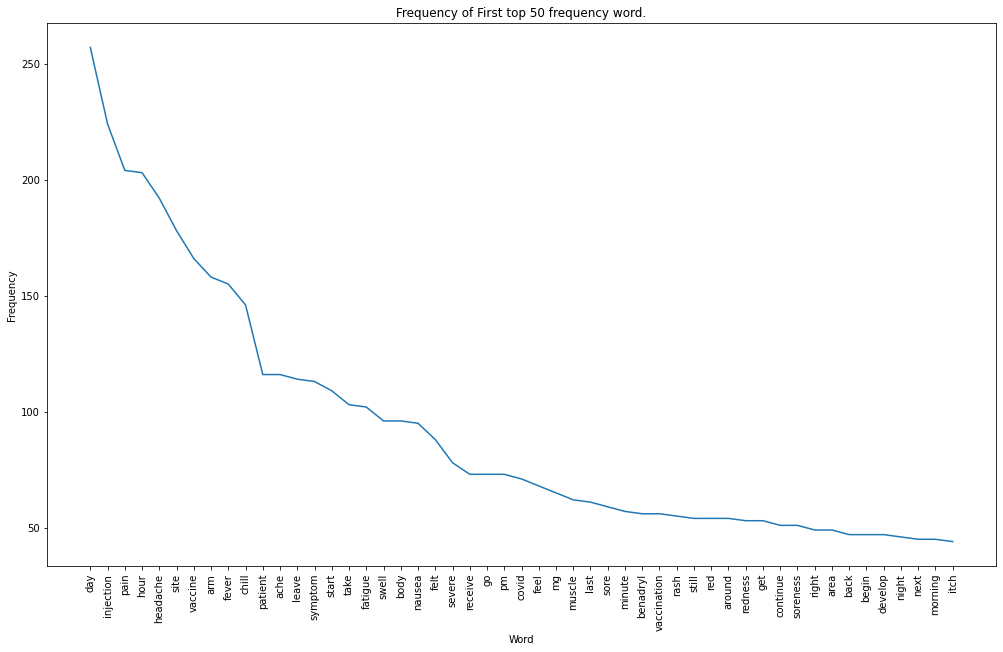

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,10))
plt.plot(most_frequent_word['Word'],most_frequent_word['Count'])
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.title('Frequency of First top 50 frequency word.')
plt.xticks(rotation=90)
plt.show()

WORD CLOUD
Shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

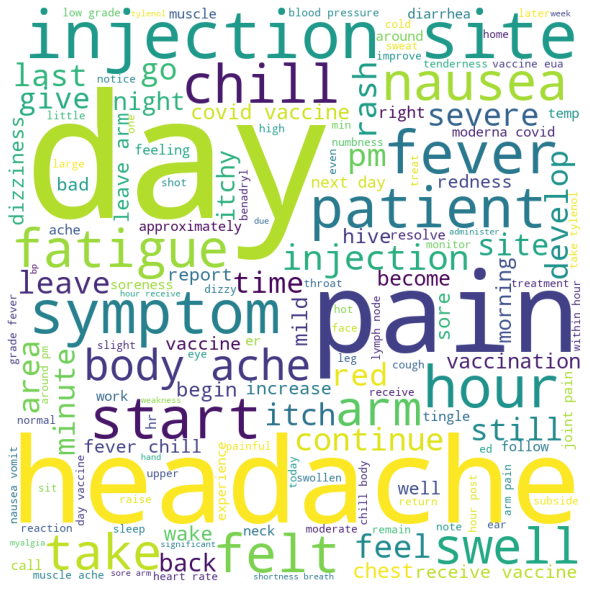

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['Processed_new']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

TEXT VECTORIZATION

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def create_document_term_matrix(message_list,vectorizer):
  doc_term_matrix=vectorizer.fit_transform(message_list)
  return pd.DataFrame(doc_term_matrix.toarray(),columns=vectorizer.get_feature_names())

In [ ]:
text=df['Processed_new']
count_vect=CountVectorizer()
create_document_term_matrix(text,count_vect)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,abate,abd,abdomen,abdominal,able,abnormal,absolutely,accept,accompany,...,yawn,year,yearold,yes,yesterday,yet,youre,zofan,zofran,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv_df = create_document_term_matrix(text,count_vect)
cv_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,abate,abd,abdomen,abdominal,able,abnormal,absolutely,accept,accompany,...,yawn,year,yearold,yes,yesterday,yet,youre,zofan,zofran,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF VECTORIZER - Term Frequency — Inverse Document Frequency

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=700)
# tfidf df_TFIDF_Vect
X=tfidf.fit_transform(df['Processed_new'])
print(X.shape)
Feature_names = tfidf.get_feature_names()
tfidf_df = pd.DataFrame(X.toarray(),columns=Feature_names)


(499, 700)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_df.head()

,abdominal,able,accompany,acetaminophen,ache,achy,acute,additional,administer,administration,...,within,without,woke,work,worsen,would,wrist,year,yesterday,zofran
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.133332,0.138953,...,0.117581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.150162,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ML PROCESS- CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

In [ ]:
import numpy as np
np.random.seed(42)
X_std = StandardScaler()
X_std = X_std.fit_transform(cv_df)

In [ ]:
km = KMeans(n_clusters=10)

In [ ]:
pred = km.fit_predict(X_std)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
centroids = km.cluster_centers_
centroids

array([[-4.48110715e-02, -4.48110715e-02, -4.48110715e-02, ...,
        -4.48110715e-02, -6.01687089e-02, -6.34361480e-02],
       [ 8.23060497e-04, -4.48110715e-02,  8.23060497e-04, ...,
         8.23060497e-04,  1.10513955e-03,  1.16515374e-03],
       [-4.48110715e-02,  2.23159136e+01, -4.48110715e-02, ...,
        -4.48110715e-02, -6.01687089e-02, -6.34361480e-02],
       ...,
       [-4.48110715e-02, -4.48110715e-02, -4.48110715e-02, ...,
        -4.48110715e-02, -6.01687089e-02, -6.34361480e-02],
       [-4.48110715e-02, -4.48110715e-02, -4.48110715e-02, ...,
        -4.48110715e-02, -6.01687089e-02, -6.34361480e-02],
       [-4.48110715e-02, -4.48110715e-02, -4.48110715e-02, ...,
        -4.48110715e-02, -6.01687089e-02, -6.34361480e-02]])

In [ ]:
cv_df['cluster']=km.labels_
df_new['cluster']=km.labels_
df_new.head()

,Id,Processed,cluster
0,0,right side epiglottis swell hinder swallowing picture take benadryl tylenol take,1
1,1,approximately 30 min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient o2 91 3 liter nc c...,1
2,2,15 minute receive vaccine patient complain left arm hurting also complain chest tightness difficulty swallow patient also vision change give patient 1 tablet benadryl 25 mg call em service ems che...,1
3,3,extreme fatigue dizziness could lift leave arm 72 hour,1
4,4,injection site swell redness warm touch itchy,1


In [ ]:
df=cv_df
df.head()

,ab,abate,abd,abdomen,abdominal,able,abnormal,absolutely,accept,accompany,...,year,yearold,yes,yesterday,yet,youre,zofan,zofran,zyrtec,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=df.iloc[:,:27]
Y=df['cluster']

FINDING K

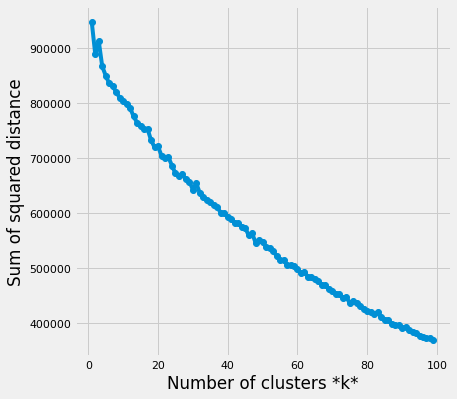

In [ ]:
# Elbow plot
# We make a plot between k value and inertia
sse = []
list_k = list(range(1, 100))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');